In [1]:
from scripts.imports import os, glob, pdb, np, h5py, pd, xr, gpd, Proj, Transformer, CRS, \
                        plt, cmap, Model, Data, ODR, datetime, rasterio, show, \
                        ccrs, cfeature
from scripts.classes_fixed import *
from scripts.pvpg_gt import *
from scripts.track_pairs import *
from scripts.pvpg_gt_penalized import pvpg_gt_penalized
from scripts.pvpg_penalized import pvpg_penalized
from scripts.pvpg_fixed import pvpg
from scripts.pvpg_penalized_flagged import pvpg_penalized_flagged

# Outliers in $\rho_v/\rho_g$ Estimation

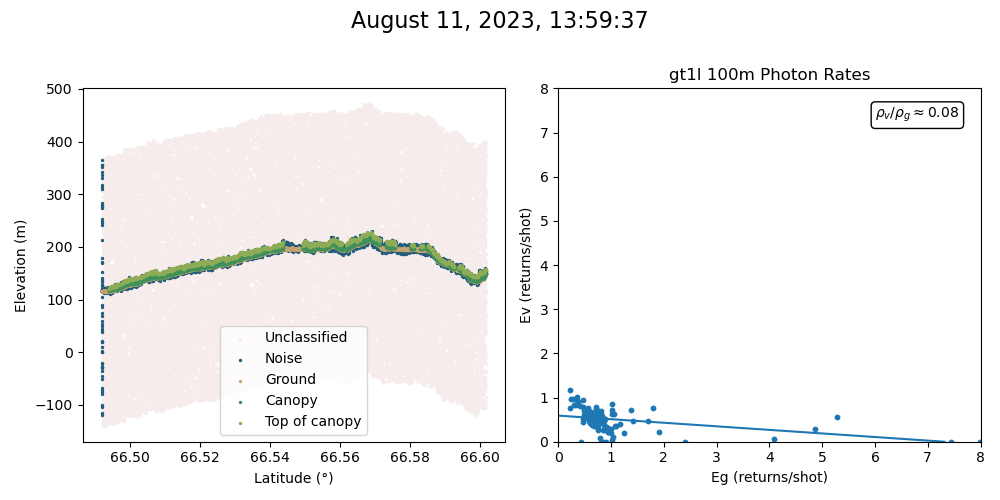

In [3]:
%matplotlib ipympl

dirpath = '../data/rovaniemi_w/'
all_ATL03, all_ATL08 = track_pairs(dirpath)

N = 45
gt = 'gt1l'
atl03path = all_ATL03[N]
atl08path = all_ATL08[N]

pvpg_gt(atl03path, atl08path, gt)

### Show location of relevant segments on a map

In [ ]:
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
# Sample DataFrame with latitude and longitude columns
# Replace this with your actual DataFrame
df = atl08.df.loc[:,['lat','lon']]
df_outlier = atl08.df[atl08.df.Eg > 4].loc[:,['lat','lon']]

# Create a map with Cartopy
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize = (10,7))
ax.set_extent([25.15,25.35,66.45,66.65])  # Set the map extent to cover Edinburgh

# Plot points from the DataFrame
ax.scatter(df['lon'], df['lat'], color='b', marker='o', label='Data Points', zorder=3, s=10)
ax.scatter(df_outlier['lon'], df_outlier['lat'], color='r', marker='x', label='Outliers', zorder=4, s=10)

tif = rasterio.open(dirpath + '/rovaniemi_image.tiff')
show(tif, ax=ax, transform=ccrs.PlateCarree())

# Add labels, title, and legend
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Map of Data Points')
ax.legend()

# Add latitude and longitude gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--', linewidth=1, color='gray', alpha=0.5)
gl.top_labels = gl.right_labels = False  # Updated lines
gl.xformatter = LongitudeFormatter()
gl.yformatter = LatitudeFormatter()

# Show the plot
plt.show()

All the outliers occur on or partially on patches of darker marshland. The lighter marshland visible in the bottom left figure does not yield similar outliers. Instead of deleting the entries with arbitrarily large values of Ev, I changed the value of these entries to 0. The classified track above show segments with no canopy cover and the track plot shows that all problem entries occurred over such treeless spaces. Thus, I felt that this change was justified; it seems like more of a data entry issue that data collection issue.

<center><img src="../data/rovaniemi_w/marsh1.png" width=440> <img src="../data/rovaniemi_w/marsh2.png" width=400></center>

<center><img src="../data/rovaniemi_w/plot1.png" width=500> <img src="../data/rovaniemi_w/plot2.png" width=500></center>

### Penalized orthogonal distance regression



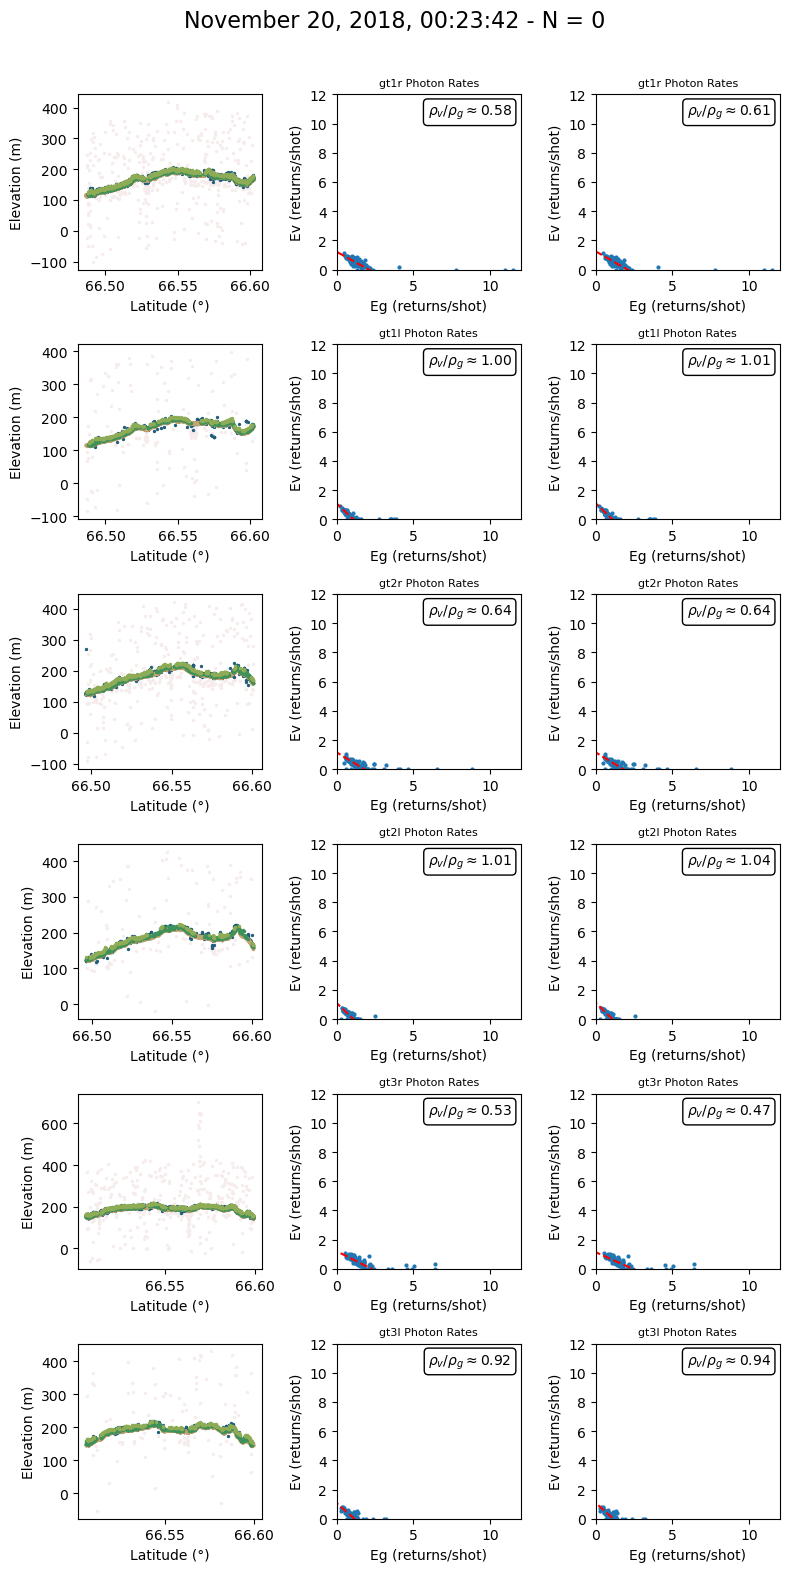

File 1 has been skipped.


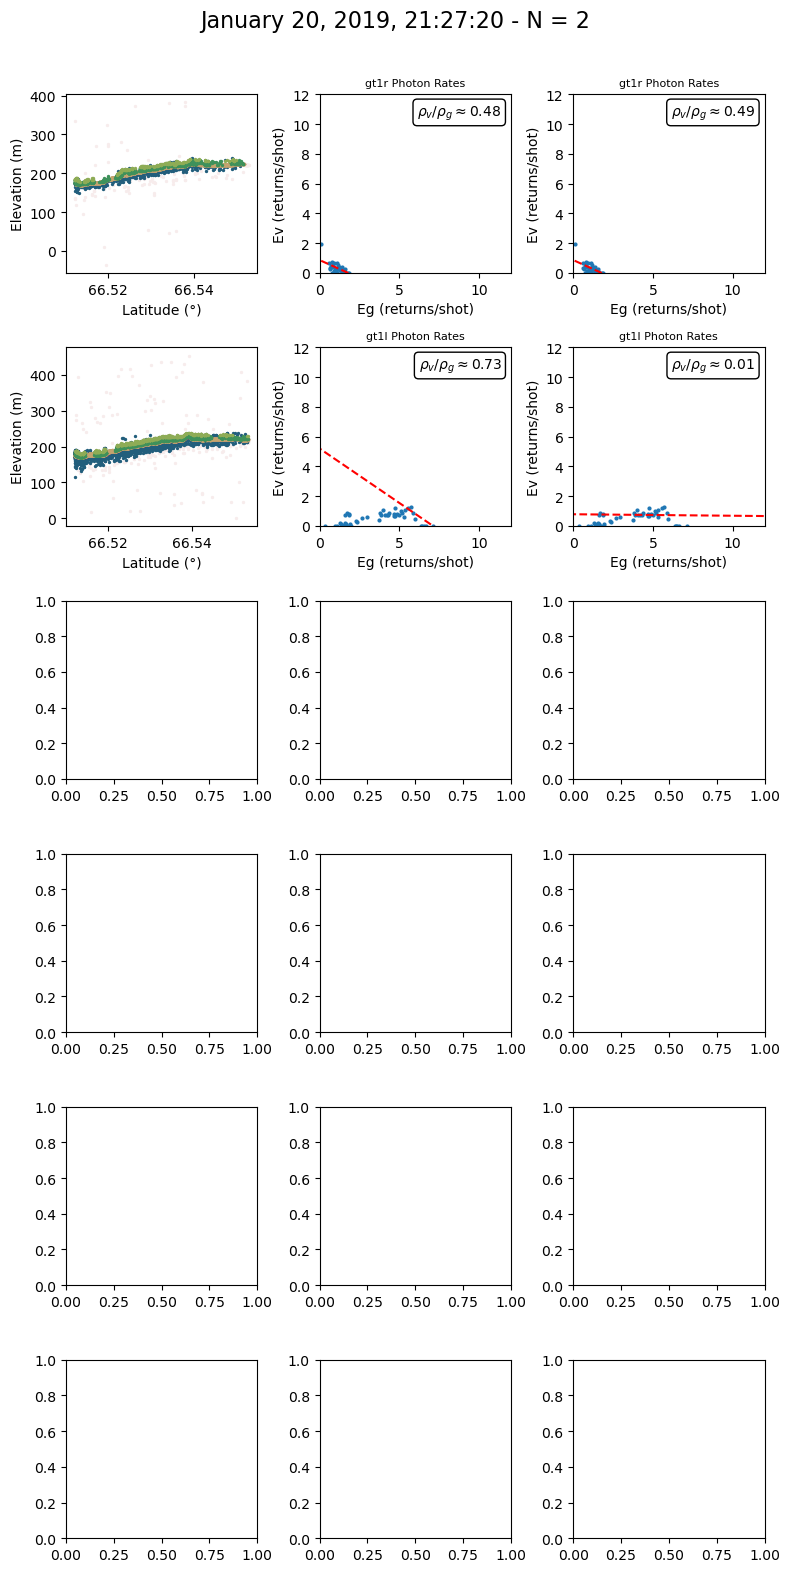

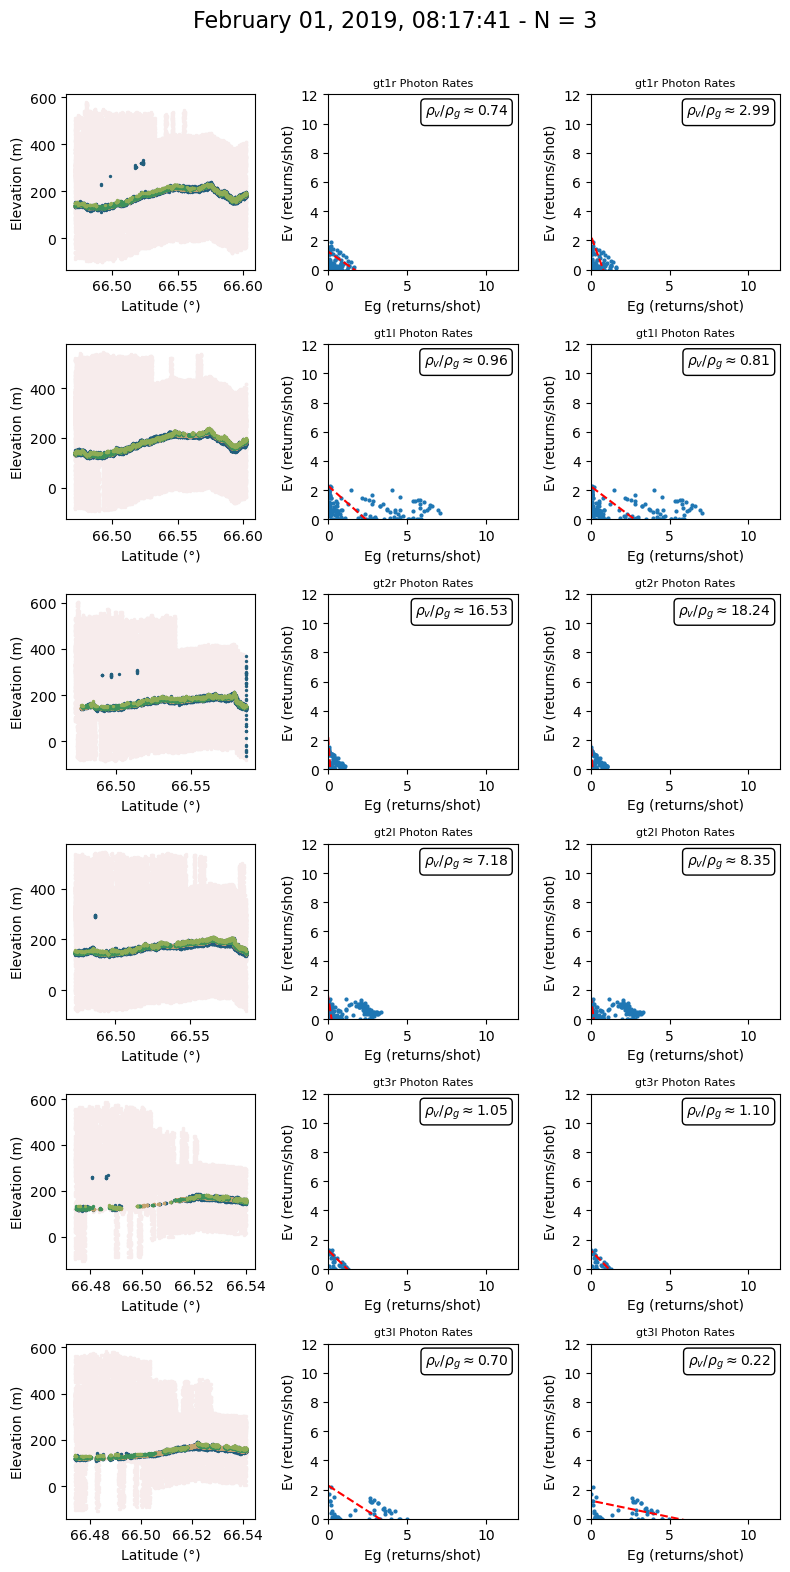

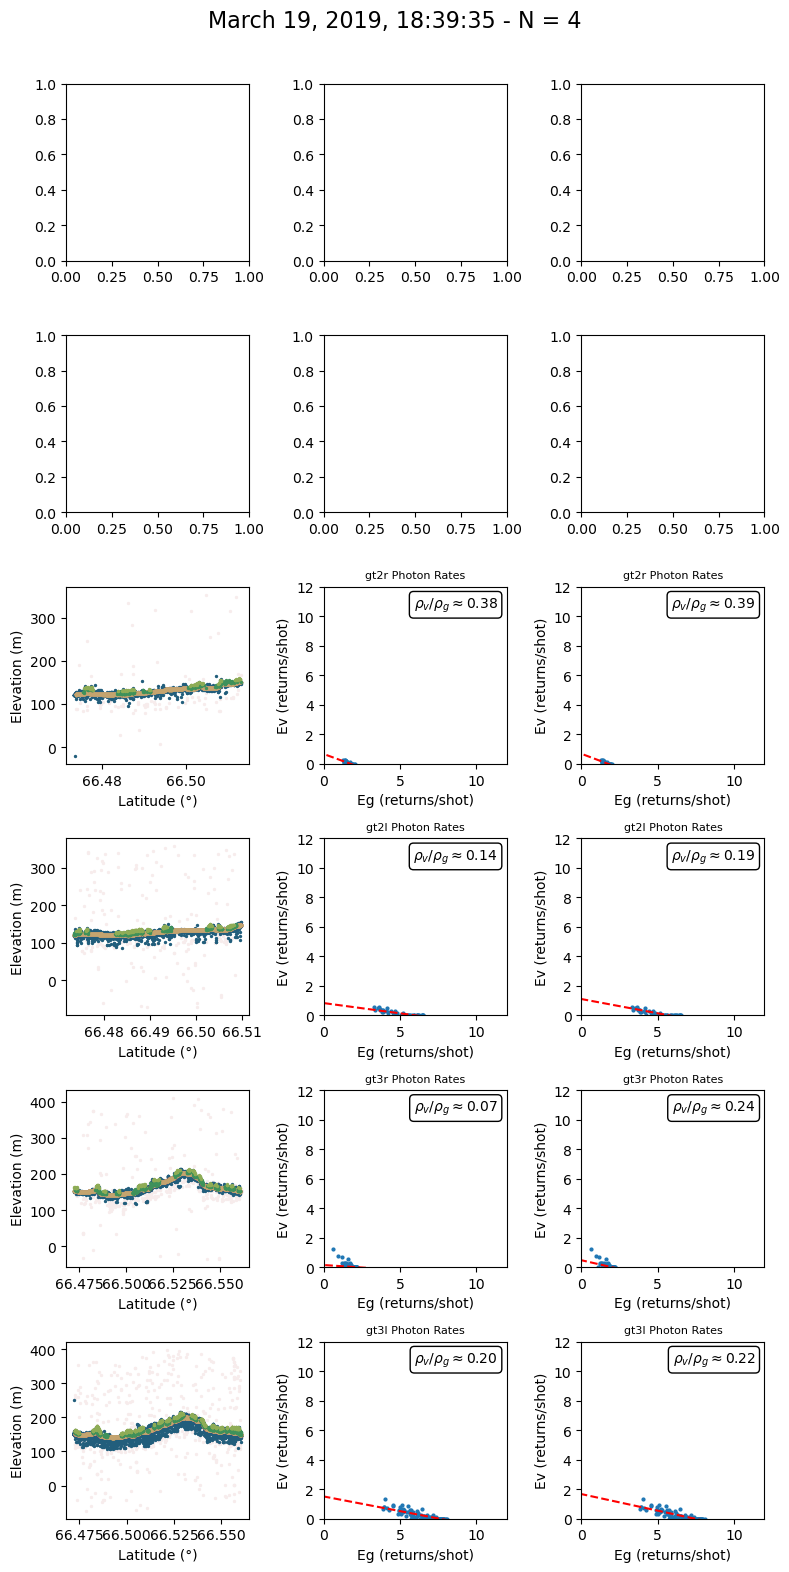

File 5 has been skipped.


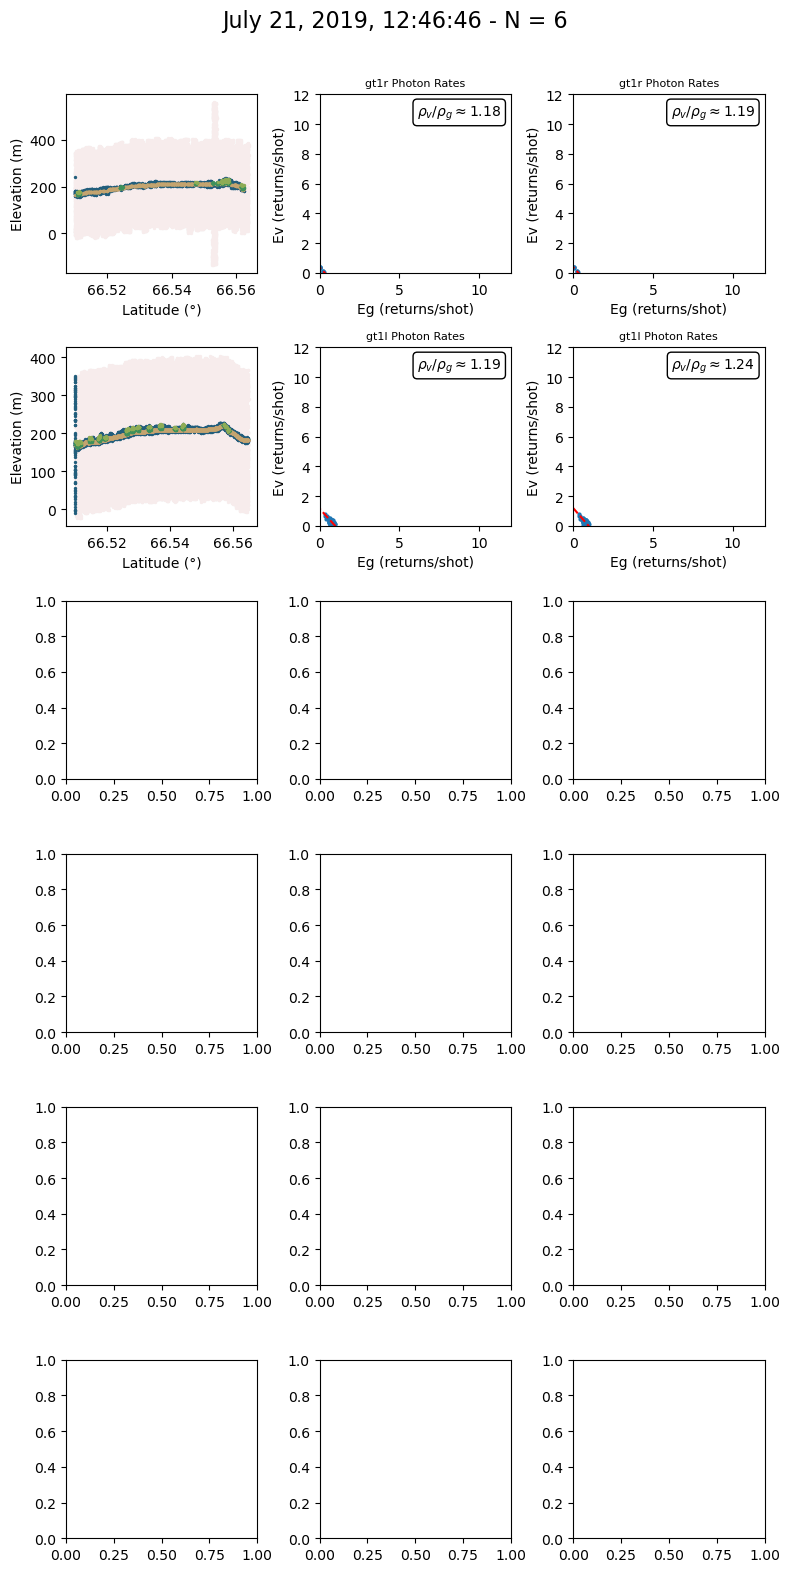

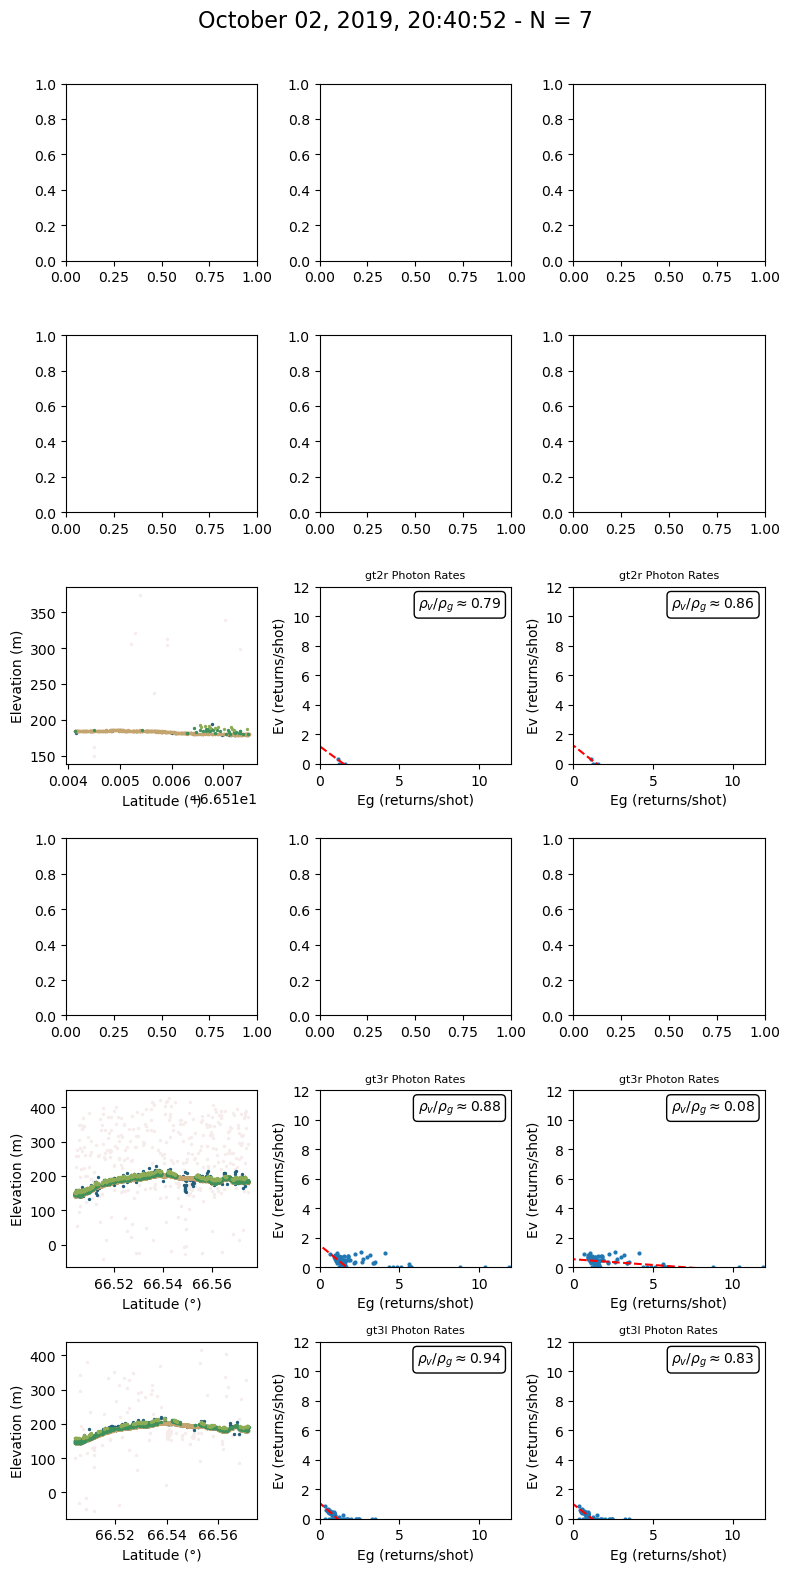

File 8 has been skipped.


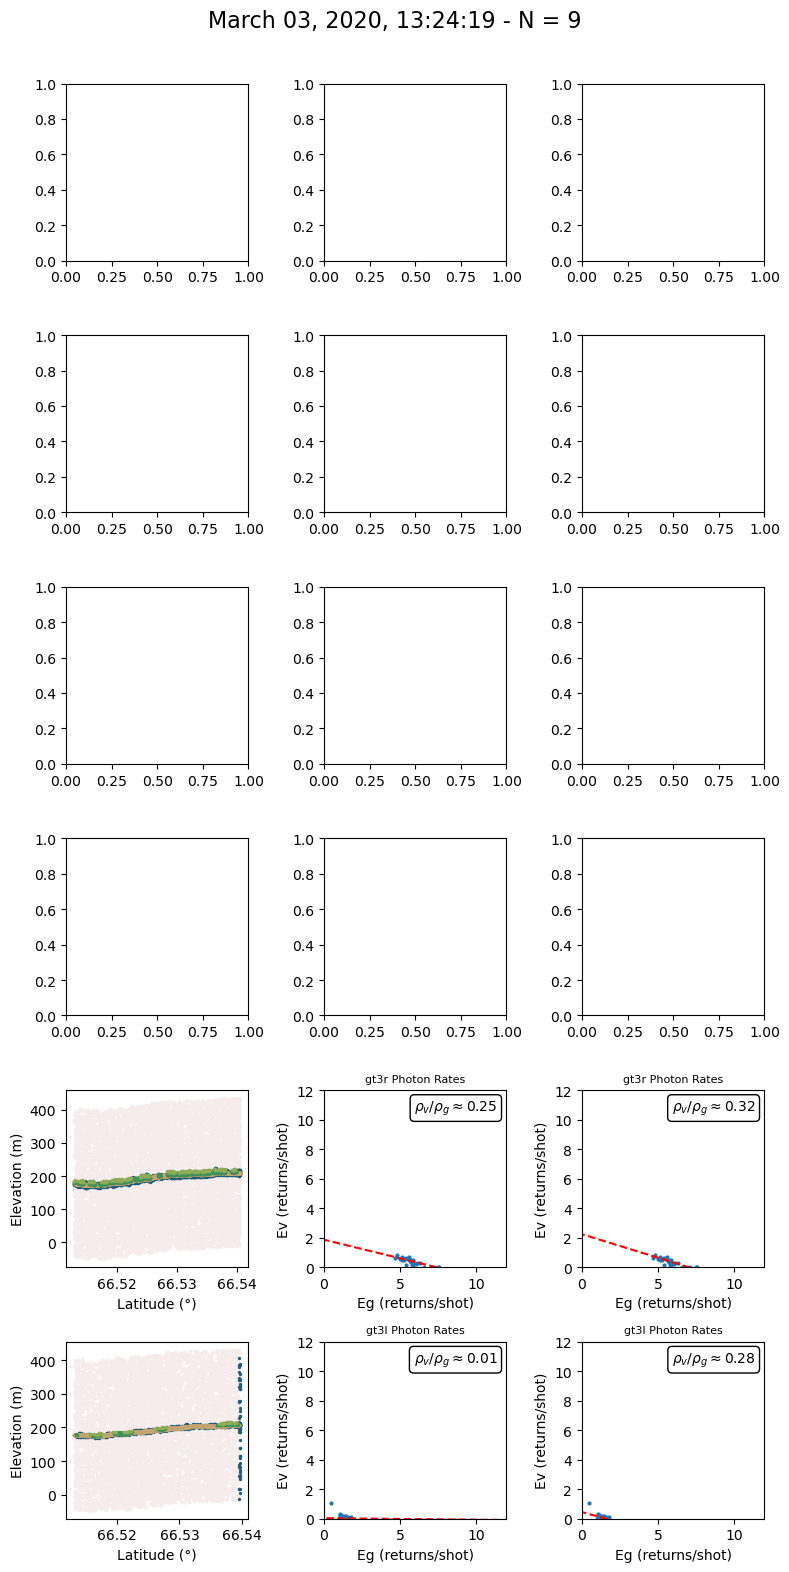

File 10 has been skipped.
File 11 has been skipped.


KeyboardInterrupt: 

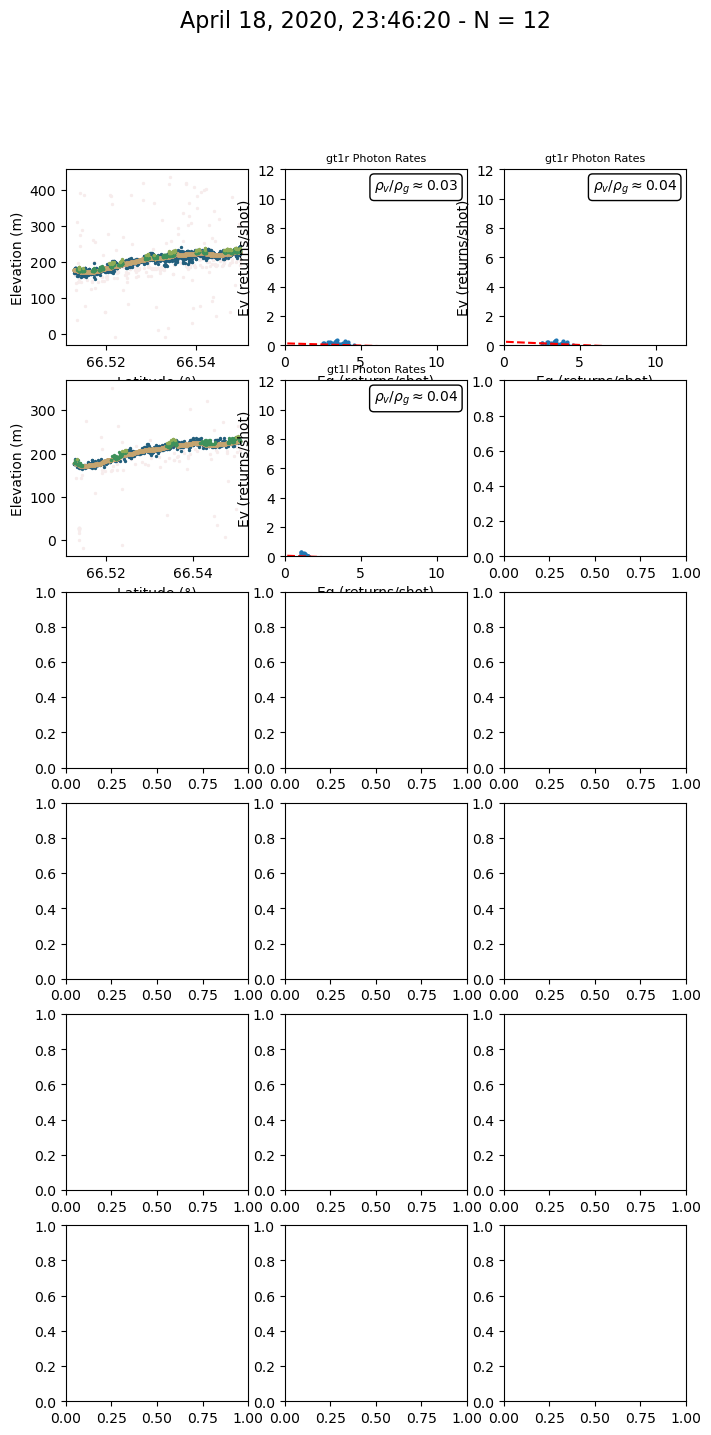

In [2]:
# %matplotlib ipympl
%matplotlib inline

dirpath = '../data/rovaniemi_w/'
all_ATL03, all_ATL08 = track_pairs(dirpath)
N = len(all_ATL03)

for j in range(0,21):
    pvpg_penalized_flagged(all_ATL03[j],all_ATL08[j], f_scale=.1, file_index=j)